# Notebook for visualizing midterm results

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Create pandas dataframe with column names for quiz data

In [67]:
file = '/Users/maltegueth/Documents/midterms_scores.csv'

questions = [str(x) for x in range(1,41)]

columns = ['student', 'percent', 'score', 'corrects', 'blanks'] + questions
data = pd.read_csv(file, sep=',', names=columns)

In [68]:
data[:10]

,student,percent,score,corrects,blanks,1,2,3,4,5,...,31,32,33,34,35,36,37,38,39,40
0,170003458,50,20,20,0,A,C,A,D,A,...,A,A,D,C,A,C,C,B,C,D
1,180002226,55,22,22,0,B,A,B,A,C,...,B,A,B,B,C,B,B,C,D,C
2,180006747,58,23,23,0,A,A,A,A,A,...,A,B,C,B,A,B,B,D,D,D
3,179000933,63,25,25,0,B,C,B,A,B,...,A,B,C,B,A,B,C,C,C,C
4,182007192,63,25,25,0,B,D,A,A,C,...,A,B,C,B,A,B,B,C,A,B
5,172005907,63,25,25,0,B,B,A,A,B,...,A,B,C,D,A,A,B,C,A,A
6,197001059,65,26,26,0,B,C,A,A,B,...,A,B,C,B,A,B,A,A,D,C
7,190009075,70,28,28,0,B,C,A,A,C,...,A,A,B,D,A,B,B,D,D,D
8,173002715,70,28,28,0,B,C,A,C,B,...,A,B,C,B,D,A,B,C,A,D
9,175001097,75,30,30,0,B,C,A,A,B,...,B,A,B,B,A,B,B,C,B,A


# Here are some basic stats from the dataframe (mean, median, sd)

In [51]:
data.percent.mean()

78.91891891891892

In [52]:
data.percent.median()

80.0

In [53]:
data.percent.std()

11.804844529020887

# Next, check some distributional plots to visualize how the class as a whole scored

In [54]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

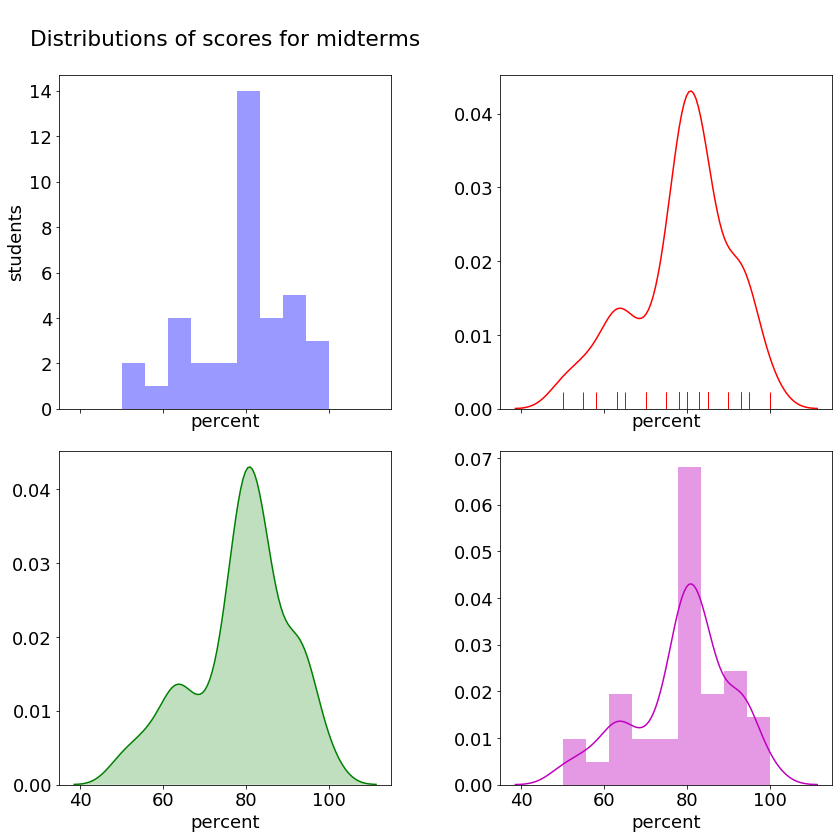

In [55]:
fig1, axes = matplotlib.pyplot.subplots(2, 2, figsize=(12, 12), sharex=True)

ax = sns.distplot(data['percent'], kde=False, color="b", ax=axes[0,0])
sns.distplot(data['percent'], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data['percent'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data['percent'], color="m", ax=axes[1, 1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of scores for midterms\n')
matplotlib.pyplot.tight_layout()

## Showing violin plots for all 40 questions is a little bit of a visual overhaul
## So I'm first showing you some item stats and identify some critical questions

In [56]:
items = '/Users/maltegueth/items.csv'

cols = ['question', 'incorrect','section']
itemsData = pd.read_csv(items, sep=',', names=cols)

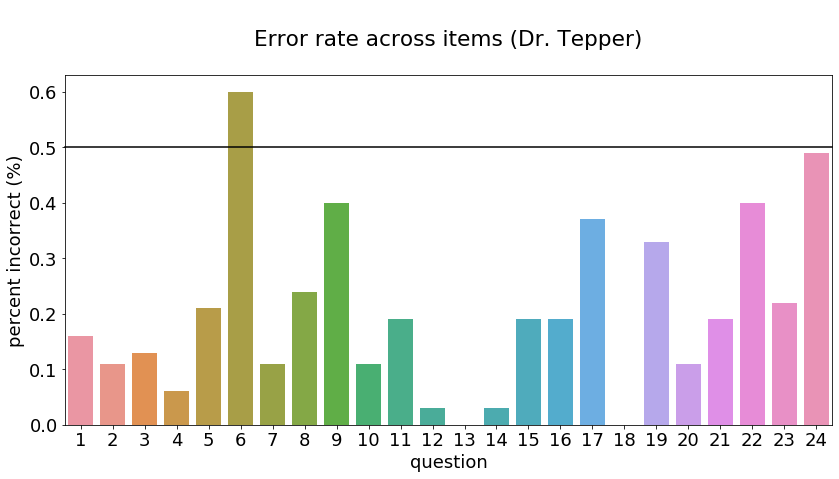

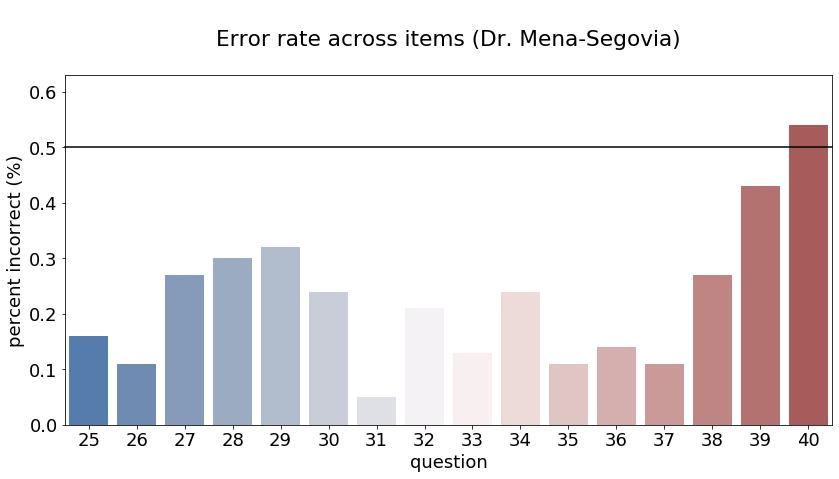

In [73]:
fig2, ax1 = plt.subplots(figsize=(12, 7), sharex=True)

sns.barplot(x='question', y='incorrect', data=itemsData[itemsData['section']==0], ax=ax1)

ax1.set(ylabel='percent incorrect (%)')
ax1.set(title='\nError rate across items (Dr. Tepper)\n')
ax1.axhline(0.5, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()


fig3, ax2 = plt.subplots(figsize=(12, 7), sharex=True)

sns.barplot(x='question', y='incorrect', palette="vlag", data=itemsData[itemsData['section']==1], ax=ax2)

ax2.set(ylabel='percent incorrect (%)')
ax2.set(title='\nError rate across items (Dr. Mena-Segovia)\n')
ax2.axhline(0.5, color="k", clip_on=False)
ax2.set(ylim=[0, 0.63])
matplotlib.pyplot.tight_layout()

In [75]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
data[questions] = data[questions].replace(mapping)

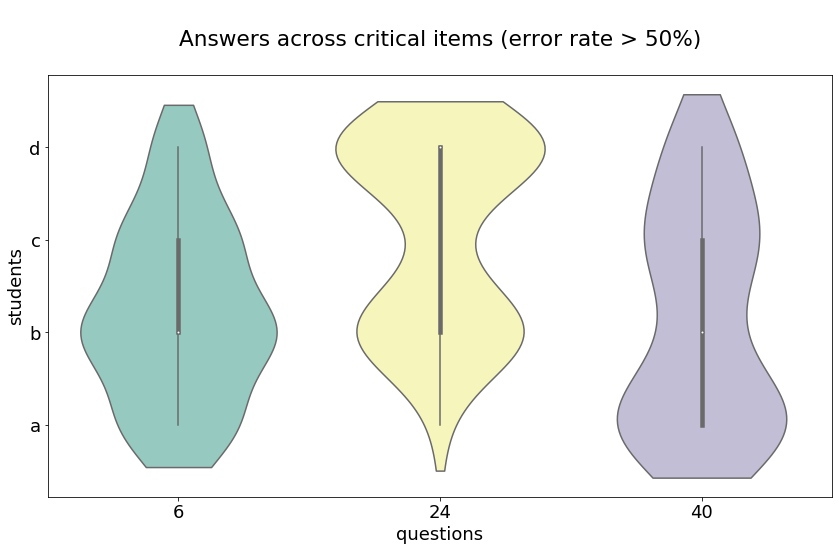

In [79]:
fig4, ax = matplotlib.pyplot.subplots(figsize=(12, 8), sharex=True)

ax = sns.violinplot(data=data.iloc[:,[10,28,44]], palette="Set3", cut=1)

ax.set(ylabel='students')
ax.set(xlabel='questions')
ax.set(yticklabels=['','a','b','c','d'])
ax.set(title='\nAnswers across critical items (error rate > 50%)\n')
matplotlib.pyplot.tight_layout()